Importing necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy import optimize
import math

Importing dataset

In [5]:
# Specifying simulation directory and the directory to save results in
wdir = str(input('Enter simulation directory path: '))

# Specifying a snapshot for temporal analysis
sdir = wdir + 'temporal_analysis/'

# Create a directory to store correlation plots
if not os.path.exists(sdir + 'correlation_plots/'):
    os.makedirs(sdir + 'correlation_plots/')

Enter simulation directory path: /Users/thepoetoftwilight/Documents/CASSI2020/CASSI2020-Results/m10q_res250/


In [6]:
# Read in all metals and find store directories to all metals
metal_df = pd.read_csv((sdir + 'metal_list.csv'))
metals = metal_df['metals'].to_list()

spath_metals = {}

for m in metals:
    spath_metals[m] = sdir + m + '/'
    
params_df = {}
mus = {}
means_mass = {}
medians_mass = {}
means_vol = {}
medians_vol = {}
stds = {}
sigmas = {}

for m in metals:
    params_df[m] = pd.read_csv(spath_metals[m] + 'data/fit/fit_{}_params.csv'.format(m))
    mus[m] = params_df[m]['mu'].to_list()
    means_mass[m] = params_df[m]['mean_mass'].to_list()
    medians_mass[m] = params_df[m]['median_mass'].to_list()
    means_vol[m] = params_df[m]['mean_vol'].to_list()
    medians_vol[m] = params_df[m]['median_vol'].to_list()
    stds[m] = params_df[m]['std'].to_list()
    sigmas[m] = params_df[m]['sigma'].to_list()

In [8]:
# Obtained statistics for the rendered snapshots

rendered_df = pd.read_csv(sdir + 'rendered_snap_stats.csv')

print(rendered_df)

rendered_indices = rendered_df['snap'].to_list()
num_snaps = len(rendered_indices)

# Get various properties of the galaxies

halo_masses = rendered_df['halo_mass'].to_list()

redshifts = rendered_df['redshift'].to_list()
times = rendered_df['time'].to_list()

# Getting sound related properties

velocities_mass = rendered_df['velocity_mass'].to_list()
velocities_vol = rendered_df['velocity_vol'].to_list()
velocities_spread = rendered_df['velocity_spread'].to_list()

sounds_mass = rendered_df['sound_mass'].to_list()
sounds_vol = rendered_df['sound_vol'].to_list()
sounds_spread = rendered_df['sound_spread'].to_list()

thermals_mass = rendered_df['thermal_mass'].to_list()
thermals_vol = rendered_df['thermal_vol'].to_list()
thermals_spread = rendered_df['thermal_spread'].to_list()

mach_numbers_mass = rendered_df['mach_number_mass'].to_list()
mach_numbers_vol = rendered_df['mach_number_vol'].to_list()

# Getting star-formation properties

SFRs_10 = rendered_df['SFR@10Myr'].to_list()
SFRs_100 = rendered_df['SFR@100Myr'].to_list()
SFRs_1000 = rendered_df['SFR@1000Myr'].to_list()

     Unnamed: 0  snap  redshift       time     halo_mass  SFR@10Myr  \
0             1   110  3.266667   2.008803  2.786898e+09   0.001611   
1             7   111  3.238411   2.028696  2.959412e+09   0.008081   
2            11   112  3.210526   2.048648  3.048775e+09   0.015893   
3            16   113  3.183007   2.068659  3.119460e+09   0.007753   
4            19   114  3.155844   2.088728  3.178012e+09   0.006455   
..          ...   ...       ...        ...           ...        ...   
447         446   596  0.000637  13.789874  8.534205e+09   0.000000   
448         448   597  0.000478  13.792092  8.534372e+09   0.000000   
449         450   598  0.000319  13.794310  8.534627e+09   0.000000   
450         451   599  0.000159  13.796529  8.534806e+09   0.000000   
451         383   600  0.000000  13.798747  8.534961e+09   0.000000   

     SFR@100Myr  SFR@1000Myr  velocity_mass  velocity_vol  ...  thermal_mass  \
0      0.001169     0.001025      35.478512     55.402683  ...     

     spread_c  spread_n  spread_o  spread_ne  spread_mg  spread_si  spread_s  \
0    0.380999  0.364220  0.407493   0.407376   0.402856   0.399732  0.391235   
1    0.376134  0.360064  0.400233   0.400114   0.395746   0.392655  0.384214   
2    0.350759  0.345432  0.366584   0.366566   0.363109   0.359794  0.352890   
3    0.373829  0.370516  0.394177   0.394068   0.390732   0.387484  0.380568   
4    0.241219  0.186104  0.318819   0.318530   0.317670   0.319912  0.318692   
..        ...       ...       ...        ...        ...        ...       ...   
447  0.071745  0.073939  0.078196   0.078351   0.078153   0.088908  0.094892   
448  0.070472  0.071944  0.078945   0.079202   0.078913   0.089470  0.095393   
449  0.068649  0.070093  0.077397   0.077644   0.077358   0.088164  0.094096   
450  0.068381  0.069624  0.077609   0.077828   0.077556   0.088523  0.094424   
451  0.068585  0.070057  0.076898   0.077142   0.076870   0.086523  0.092058   

     spread_ca  spread_fe  
0     0.380

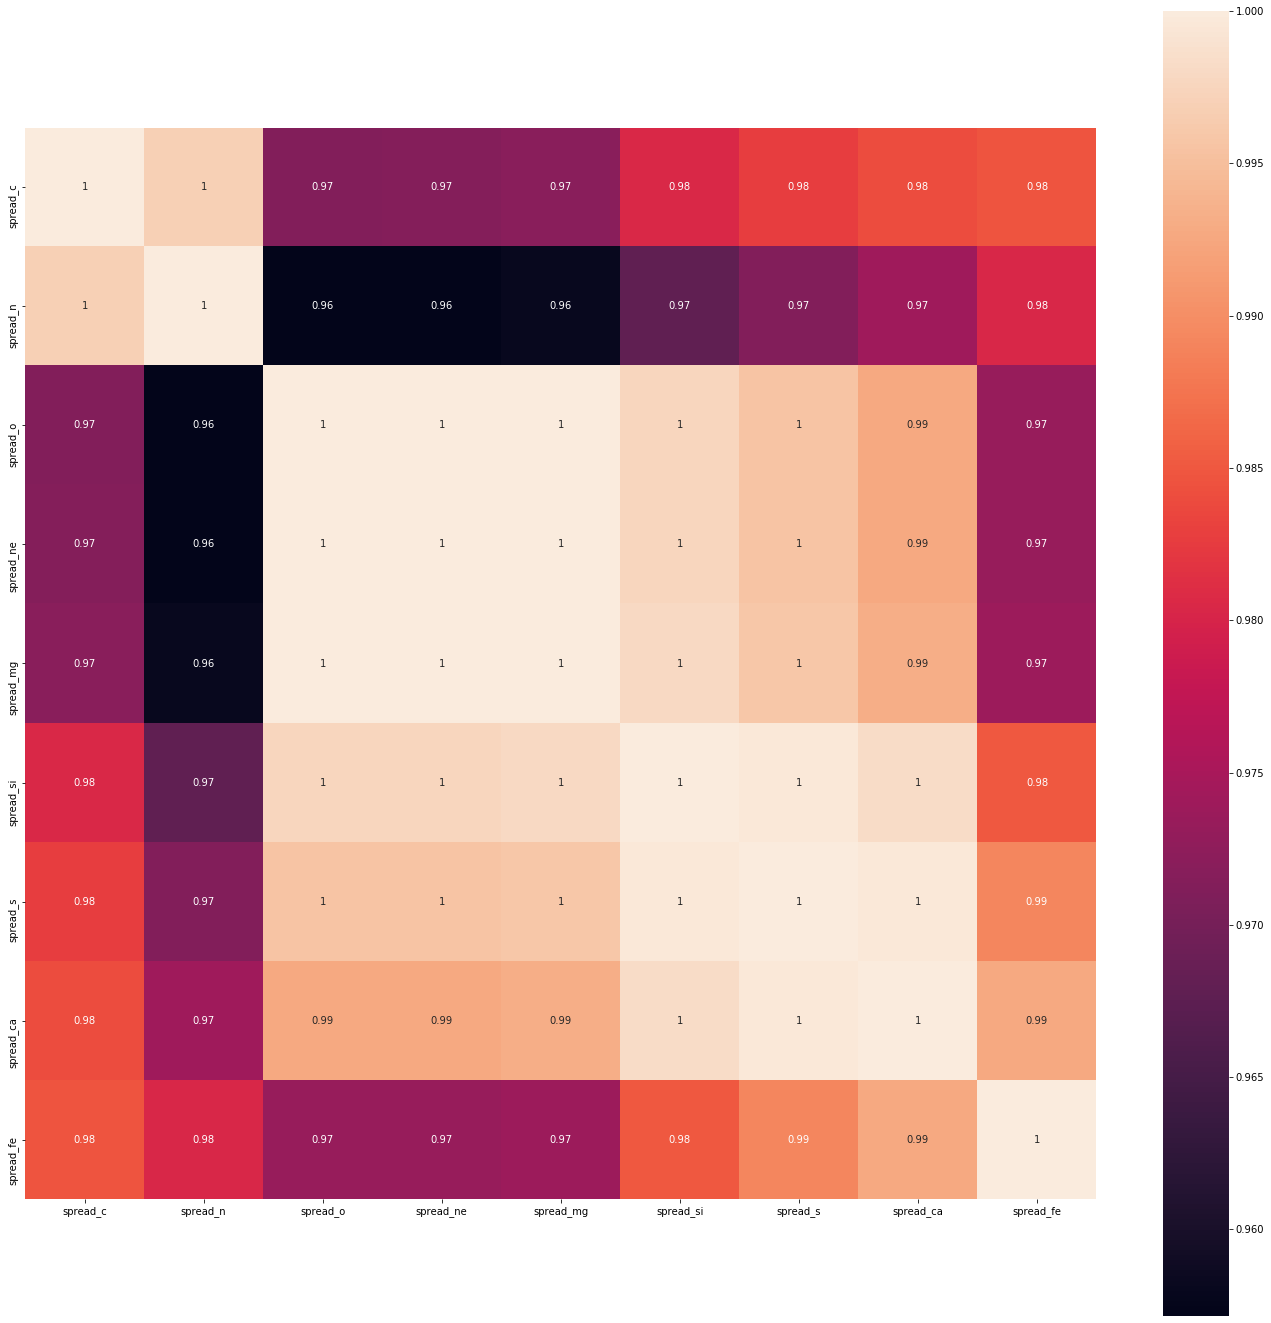

In [9]:
# Correlating abundance spread of all elements with each other

columns_spread = ['spread_' + m for m in metals]

spread_df = pd.DataFrame(columns = columns_spread)

for m in metals:
    spread_df['spread_' + m] = params_df[m]['std']
    
print(spread_df)
    
spread_corr = spread_df.corr()

plt.subplots(figsize = (24, 24))
sns.heatmap(spread_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/spread_corr.png')
plt.show()
plt.close()

     cent_mass_c  cent_mass_n  cent_mass_o  cent_mass_ne  cent_mass_mg  \
0      -2.199921    -2.607189    -1.916933     -1.850180     -2.091201   
1      -2.107883    -2.498709    -1.836583     -1.769537     -2.011034   
2      -2.007723    -2.395229    -1.733406     -1.666041     -1.907975   
3      -2.052550    -2.489232    -1.724195     -1.656826     -1.898856   
4      -1.949174    -2.369128    -1.625006     -1.559021     -1.800186   
..           ...          ...          ...           ...           ...   
447    -0.937612    -1.169689    -0.988337     -0.924576     -1.163268   
448    -0.936933    -1.168458    -0.988044     -0.924348     -1.162906   
449    -0.937002    -1.168846    -0.988333     -0.924493     -1.163114   
450    -0.936789    -1.168764    -0.988511     -0.924358     -1.163248   
451    -0.936275    -1.168483    -0.988095     -0.923825     -1.162870   

     cent_mass_si  cent_mass_s  cent_mass_ca  cent_mass_fe  
0       -2.077893    -2.131008     -2.407067     -

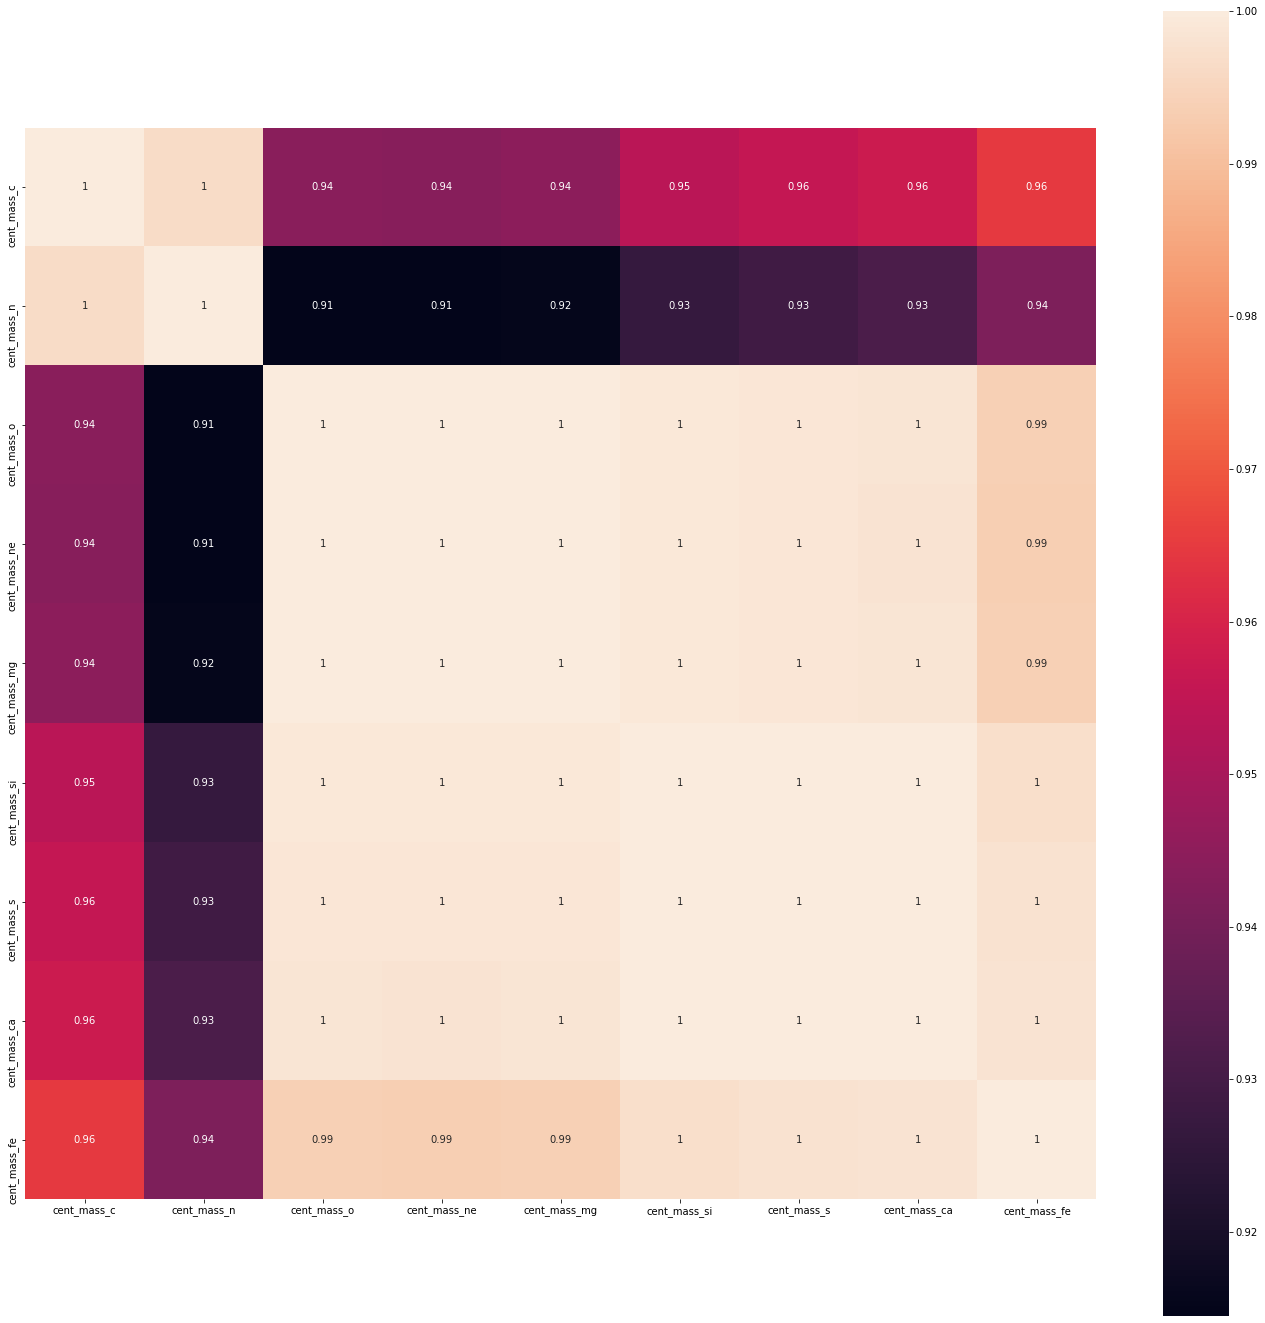

In [10]:
columns_cent_mass = ['cent_mass_' + m for m in metals]

cent_mass_df = pd.DataFrame(columns = columns_cent_mass)

for m in metals:
    cent_mass_df['cent_mass_' + m] = params_df[m]['median_mass']
    
print(cent_mass_df)
    
cent_mass_corr = cent_mass_df.corr()

plt.subplots(figsize = (24, 24))
sns.heatmap(cent_mass_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/cent_mass_corr.png')
plt.show()
plt.close()

     cent_vol_c  cent_vol_n  cent_vol_o  cent_vol_ne  cent_vol_mg  \
0     -2.199921   -2.607189   -1.916933    -1.850180    -2.091201   
1     -2.107883   -2.498709   -1.836583    -1.769537    -2.011034   
2     -2.007723   -2.395229   -1.733406    -1.666041    -1.907975   
3     -2.052550   -2.489232   -1.724195    -1.656826    -1.898856   
4     -1.949174   -2.369128   -1.625006    -1.559021    -1.800186   
..          ...         ...         ...          ...          ...   
447   -0.937612   -1.169689   -0.988337    -0.924576    -1.163268   
448   -0.936933   -1.168458   -0.988044    -0.924348    -1.162906   
449   -0.937002   -1.168846   -0.988333    -0.924493    -1.163114   
450   -0.936789   -1.168764   -0.988511    -0.924358    -1.163248   
451   -0.936275   -1.168483   -0.988095    -0.923825    -1.162870   

     cent_vol_si  cent_vol_s  cent_vol_ca  cent_vol_fe  
0      -2.077893   -2.131008    -2.407067    -2.449245  
1      -1.999744   -2.053668    -2.331401    -2.376410  


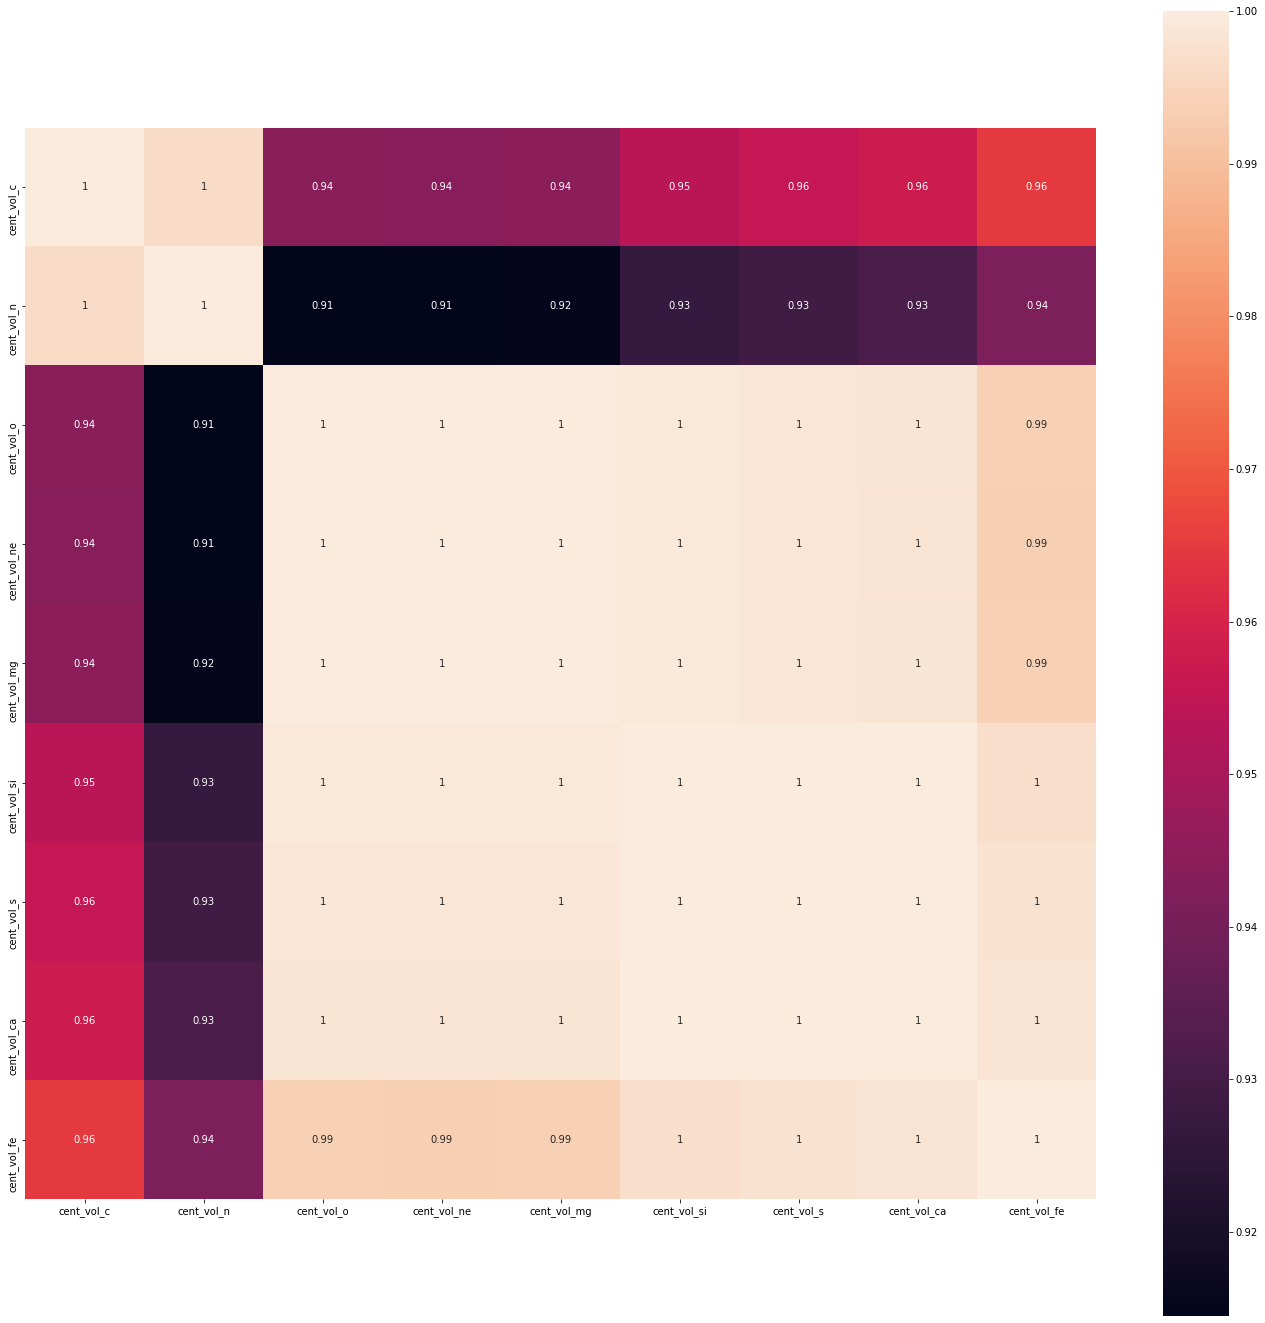

In [11]:
columns_cent_vol = ['cent_vol_' + m for m in metals]

cent_vol_df = pd.DataFrame(columns = columns_cent_vol)

for m in metals:
    cent_vol_df['cent_vol_' + m] = params_df[m]['median_vol']
    
print(cent_vol_df)
    
cent_vol_corr = cent_vol_df.corr()

plt.subplots(figsize = (24, 24))
sns.heatmap(cent_vol_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/cent_vol_corr.png')
plt.show()
plt.close()

             cent_mass_c  cent_mass_n  cent_mass_o  cent_mass_ne  \
cent_vol_c      1.000000     0.996434     0.943921      0.943837   
cent_vol_n      0.996434     1.000000     0.914672      0.914514   
cent_vol_o      0.943921     0.914672     1.000000      0.999988   
cent_vol_ne     0.943837     0.914514     0.999988      1.000000   
cent_vol_mg     0.944574     0.915404     0.999992      0.999992   
cent_vol_si     0.953829     0.926749     0.999221      0.999159   
cent_vol_s      0.955782     0.929185     0.998793      0.998717   
cent_vol_ca     0.957449     0.931276     0.998344      0.998257   
cent_vol_fe     0.964785     0.941841     0.993765      0.993504   

             cent_mass_mg  cent_mass_si  cent_mass_s  cent_mass_ca  \
cent_vol_c       0.944574      0.953829     0.955782      0.957449   
cent_vol_n       0.915404      0.926749     0.929185      0.931276   
cent_vol_o       0.999992      0.999221     0.998793      0.998344   
cent_vol_ne      0.999992      0.999159

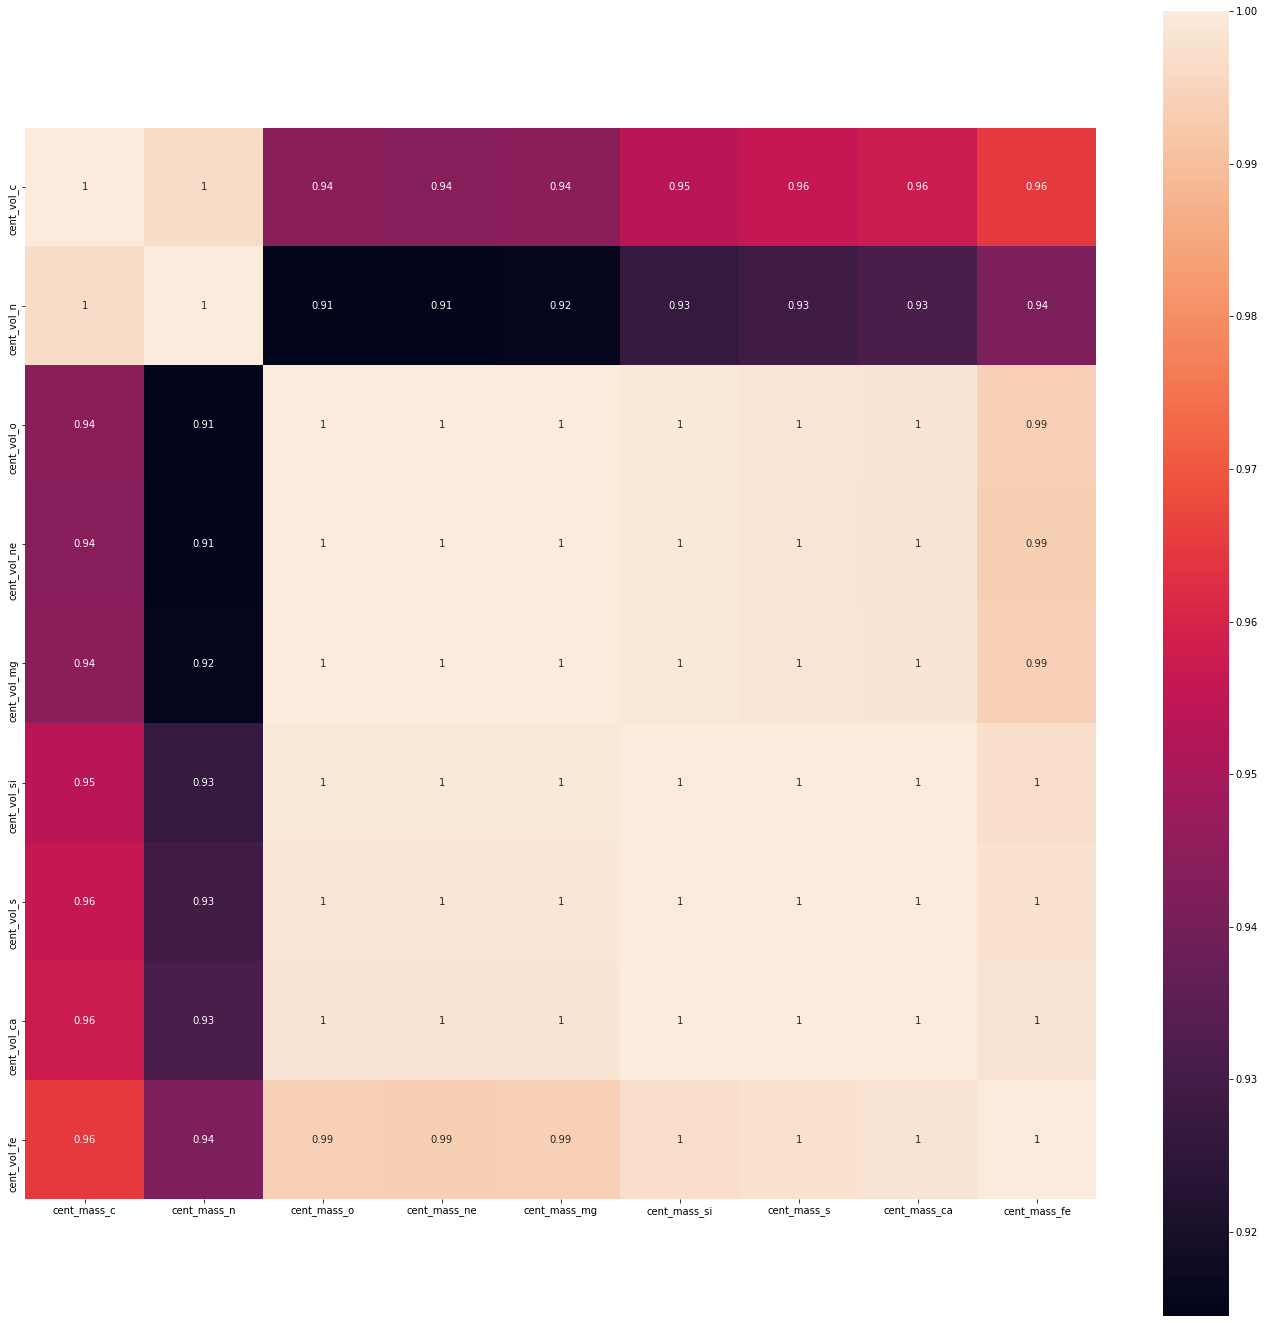

In [12]:
cent_mass_cent_vol_corr = pd.concat([cent_vol_df, cent_mass_df], axis=1, 
                                keys=['cent_vol_df', 'cent_mass_df']).corr().loc['cent_vol_df', 'cent_mass_df']
print(cent_mass_cent_vol_corr)

plt.subplots(figsize = (24, 24))
sns.heatmap(cent_mass_cent_vol_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/cent_mass_cent_vol_corr.png')
plt.show()
plt.close()

              spread_c  spread_n  spread_o  spread_ne  spread_mg  spread_si  \
cent_mass_c  -0.889419 -0.874107 -0.889422  -0.890486  -0.891224  -0.891948   
cent_mass_n  -0.862546 -0.843224 -0.870215  -0.871350  -0.872013  -0.871328   
cent_mass_o  -0.961099 -0.960295 -0.939299  -0.939867  -0.940686  -0.945220   
cent_mass_ne -0.960951 -0.960270 -0.938536  -0.939108  -0.939934  -0.944718   
cent_mass_mg -0.960520 -0.959730 -0.938517  -0.939093  -0.939919  -0.944524   
cent_mass_si -0.957317 -0.954985 -0.939174  -0.939776  -0.940595  -0.944264   
cent_mass_s  -0.955997 -0.953368 -0.938792  -0.939400  -0.940226  -0.943691   
cent_mass_ca -0.954887 -0.952040 -0.938170  -0.938788  -0.939630  -0.942992   
cent_mass_fe -0.952446 -0.947235 -0.943148  -0.943759  -0.944610  -0.946261   

              spread_s  spread_ca  spread_fe  
cent_mass_c  -0.887901  -0.882133  -0.849202  
cent_mass_n  -0.866182  -0.859150  -0.821022  
cent_mass_o  -0.945848  -0.945690  -0.936495  
cent_mass_ne -0.94543

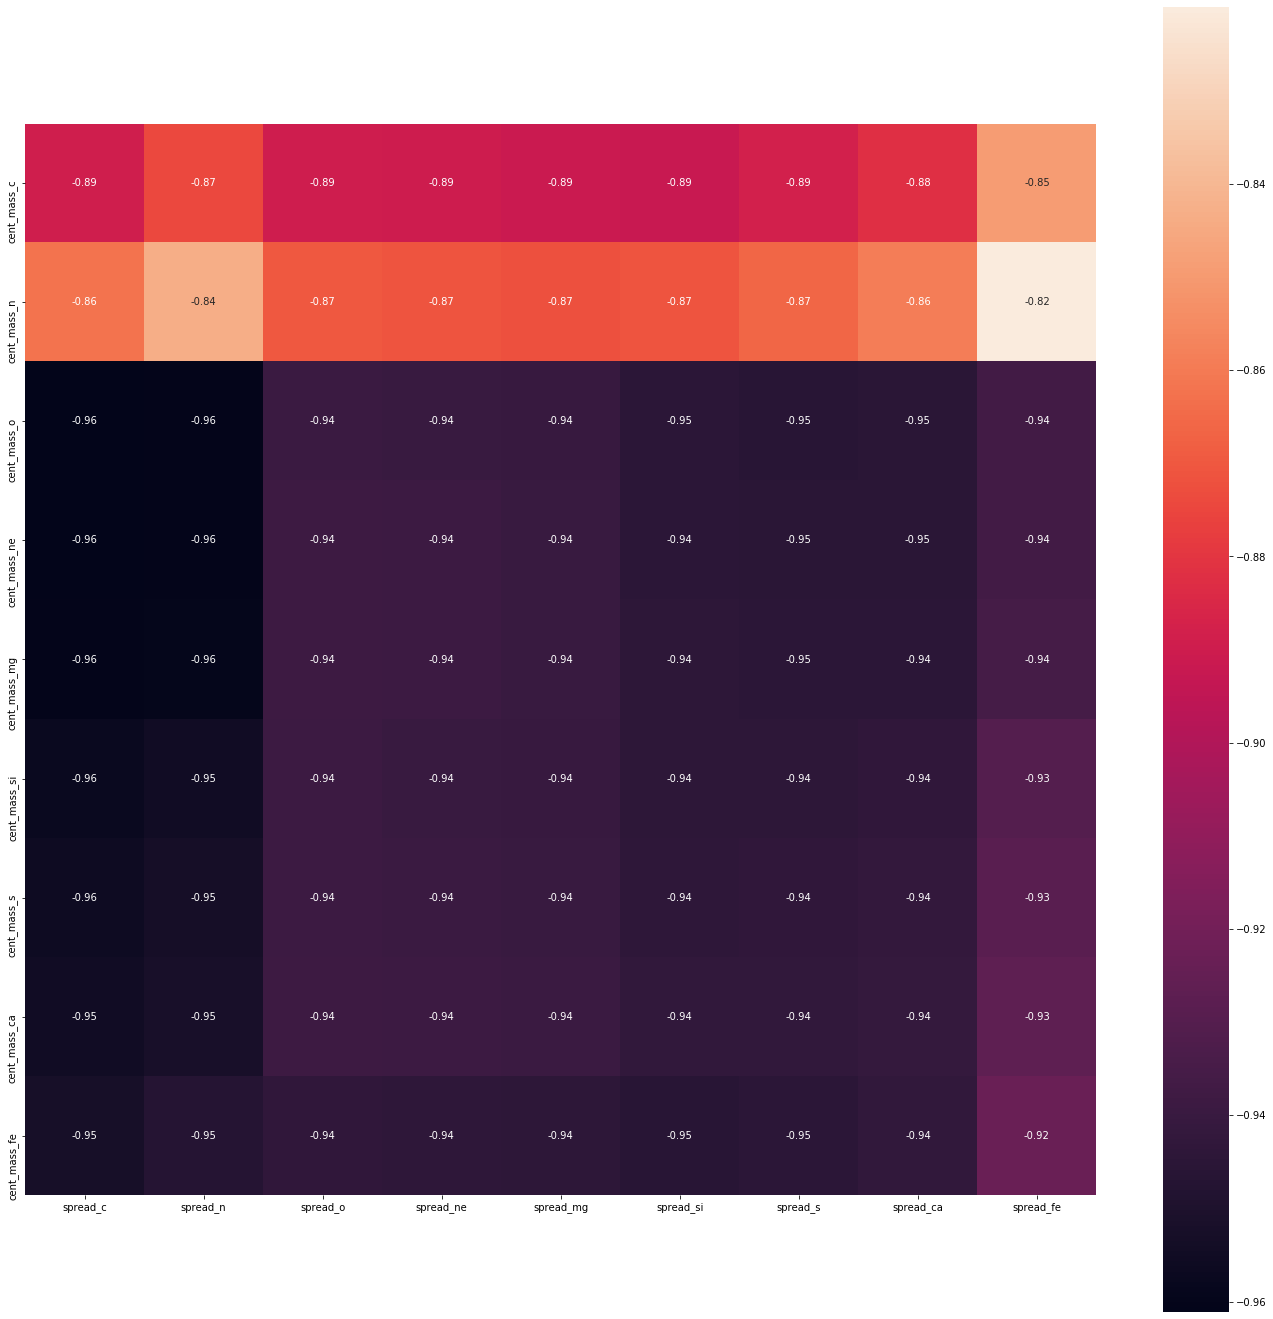

In [13]:
spread_cent_mass_corr = pd.concat([cent_mass_df, spread_df], axis=1, keys=['cent_mass_df', 'spread_df']).corr().loc['cent_mass_df', 'spread_df']
print(spread_cent_mass_corr)

plt.subplots(figsize = (24, 24))
sns.heatmap(spread_cent_mass_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/spread_cent_mass_corr.png')
plt.show()
plt.close()

             spread_c  spread_n  spread_o  spread_ne  spread_mg  spread_si  \
cent_vol_c  -0.889419 -0.874107 -0.889422  -0.890486  -0.891224  -0.891948   
cent_vol_n  -0.862546 -0.843224 -0.870215  -0.871350  -0.872013  -0.871328   
cent_vol_o  -0.961099 -0.960295 -0.939299  -0.939867  -0.940686  -0.945220   
cent_vol_ne -0.960951 -0.960270 -0.938536  -0.939108  -0.939934  -0.944718   
cent_vol_mg -0.960520 -0.959730 -0.938517  -0.939093  -0.939919  -0.944524   
cent_vol_si -0.957317 -0.954985 -0.939174  -0.939776  -0.940595  -0.944264   
cent_vol_s  -0.955997 -0.953368 -0.938792  -0.939400  -0.940226  -0.943691   
cent_vol_ca -0.954887 -0.952040 -0.938170  -0.938788  -0.939630  -0.942992   
cent_vol_fe -0.952446 -0.947235 -0.943148  -0.943759  -0.944610  -0.946261   

             spread_s  spread_ca  spread_fe  
cent_vol_c  -0.887901  -0.882133  -0.849202  
cent_vol_n  -0.866182  -0.859150  -0.821022  
cent_vol_o  -0.945848  -0.945690  -0.936495  
cent_vol_ne -0.945430  -0.945352  -

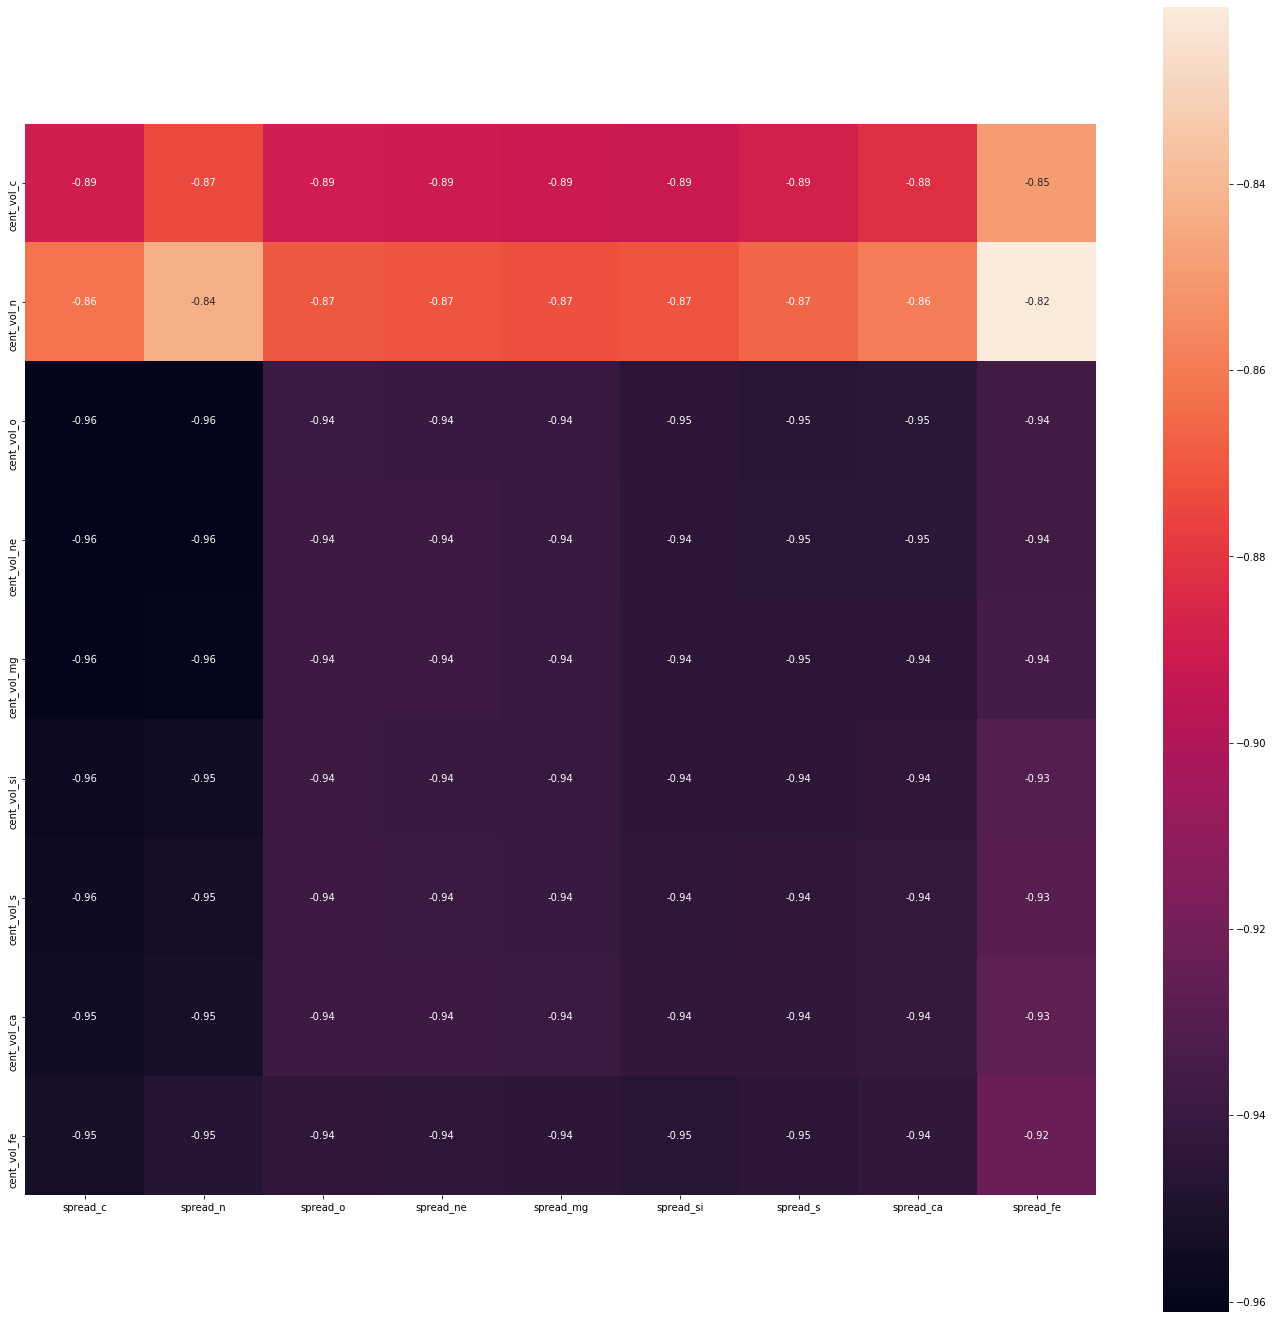

In [14]:
spread_cent_vol_corr = pd.concat([cent_vol_df, spread_df], axis=1, keys=['cent_vol_df', 'spread_df']).corr().loc['cent_vol_df', 'spread_df']
print(spread_cent_vol_corr)

plt.subplots(figsize = (24, 24))
sns.heatmap(spread_cent_vol_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/spread_cent_vol_corr.png')
plt.show()
plt.close()

In [15]:
fe_columns = ['spread_fe', 'cent_mass_fe', 'cent_vol_fe']
fe_df = pd.DataFrame({'spread_fe': params_df['fe']['std'], 'cent_mass_fe': params_df['fe']['median_mass'],
                     'cent_vol_fe': params_df['fe']['median_vol']})

print(fe_df)

     spread_fe  cent_mass_fe  cent_vol_fe
0     0.390091     -2.449245    -2.449245
1     0.382483     -2.376410    -2.376410
2     0.348710     -2.287295    -2.287295
3     0.374076     -2.291107    -2.291107
4     0.329160     -2.094939    -2.094939
..         ...           ...          ...
447   0.139652     -1.240304    -1.240304
448   0.139226     -1.239636    -1.239636
449   0.137825     -1.239873    -1.239873
450   0.137703     -1.238785    -1.238785
451   0.133873     -1.238835    -1.238835

[452 rows x 3 columns]


              SFR@10Myr  SFR@100Myr  SFR@1000Myr  halo_mass  velocity_mass  \
spread_fe      0.170751    0.230865     0.803002  -0.812286      -0.705151   
cent_mass_fe  -0.234948   -0.290112    -0.830314   0.896140       0.836760   
cent_vol_fe   -0.234948   -0.290112    -0.830314   0.896140       0.836760   

              sound_mass  thermal_mass  velocity_vol  sound_vol  thermal_vol  \
spread_fe       0.899060      0.899060     -0.756669   0.911641     0.911641   
cent_mass_fe   -0.954228     -0.954227      0.868852  -0.973134    -0.973134   
cent_vol_fe    -0.954228     -0.954227      0.868852  -0.973134    -0.973134   

              mach_number_mass  mach_number_vol  
spread_fe            -0.759448        -0.777445  
cent_mass_fe          0.873399         0.887722  
cent_vol_fe           0.873399         0.887722  


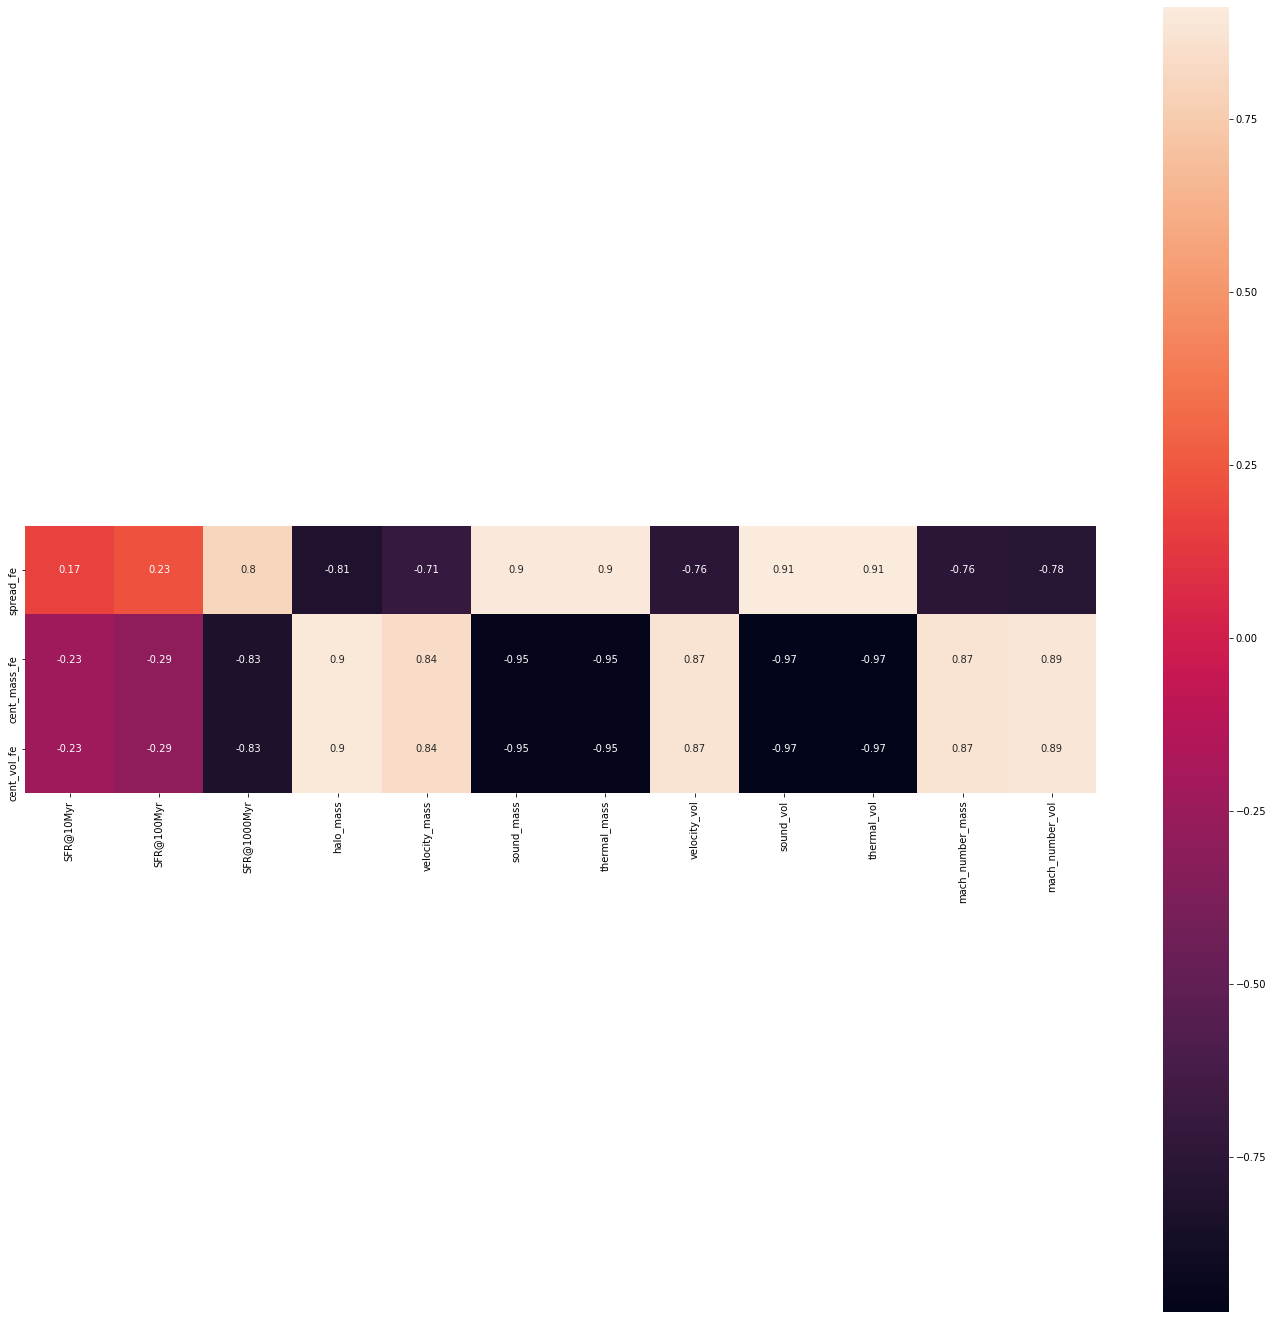

In [18]:
phy_df = rendered_df[['SFR@10Myr', 'SFR@100Myr', 'SFR@1000Myr', 'halo_mass', 'velocity_mass', 'sound_mass', 
                        'thermal_mass','velocity_vol', 'sound_vol', 'thermal_vol', 'mach_number_mass', 
                        'mach_number_vol']].copy()

phy_chem_corr = pd.concat([fe_df, phy_df], axis=1, keys=['fe_df', 'phy_df']).corr().loc['fe_df', 'phy_df']
print(phy_chem_corr)

plt.subplots(figsize = (24, 24))
sns.heatmap(phy_chem_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/phy_fe_corr.png')
plt.show()
plt.close()

/Users/thepoetoftwilight/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


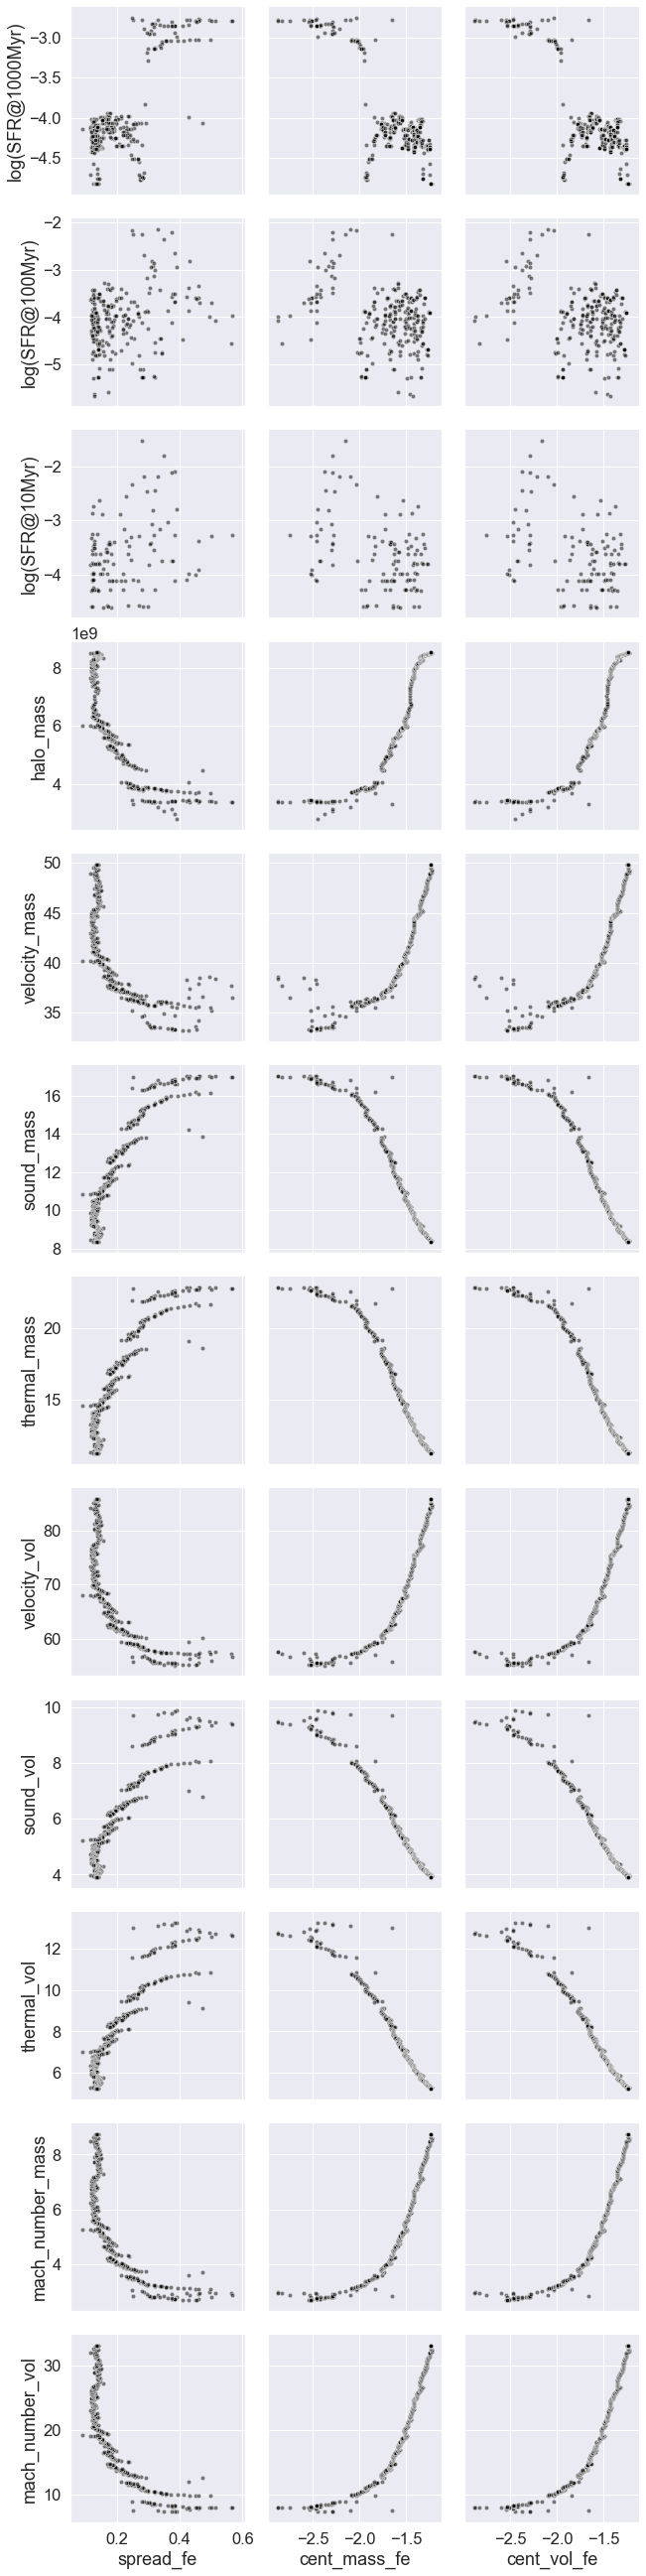

In [19]:
phy_fe_df = pd.concat([fe_df, phy_df], axis = 1)
phy_fe_df['SFR@10Myr'] = np.log10(phy_fe_df['SFR@10Myr'])
phy_fe_df['SFR@100Myr'] = np.log10(phy_fe_df['SFR@100Myr'])
phy_fe_df['SFR@1000Myr'] = np.log10(phy_fe_df['SFR@1000Myr'])

phy_fe_df = phy_fe_df.rename(columns = {'SFR@10Myr': 'log(SFR@10Myr)', 'SFR@100Myr': 'log(SFR@100Myr)',
                                        'SFR@1000Myr': 'log(SFR@1000Myr)'})

sns.set(font_scale = 1.5)
scat_mat = sns.pairplot(phy_fe_df, x_vars = ['spread_fe', 'cent_mass_fe', 'cent_vol_fe'],
            y_vars = ['log(SFR@1000Myr)', 'log(SFR@100Myr)', 'log(SFR@10Myr)', 'halo_mass', 
                      'velocity_mass', 'sound_mass', 'thermal_mass',
                      'velocity_vol', 'sound_vol', 'thermal_vol', 
                      'mach_number_mass', 'mach_number_vol'], height = 3, aspect = 1, 
                        plot_kws={'s': 20, 'alpha': 0.5, 'color': 'black', 'edgecolors': None})
scat_mat.savefig(sdir + 'correlation_plots/phy_fe_scatter_matrix.pdf')